In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np

In [2]:
def load_data(dir_name):

    exp_dic = {}
    
    exp_dic['prog'] = xr.open_mfdataset(dir_name + 'prog.nc', decode_times=False)
    #exp_dic['cont'] = xr.open_mfdataset(dir_name + 'cont*.nc', decode_times=False)
    #exp_dic['stat'] = xr.open_dataset(dir_name + 'ocean.stats.nc')

    return exp_dic

In [37]:
exp_ANN = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_ann_nondim_test/')

In [38]:
exp_ANN['prog']

<xarray.Dataset>
Dimensions:  (xq: 61, yh: 80, zl: 2, Time: 15, xh: 60, yq: 81, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 20.0 40.0 60.0 ... 1.16e+03 1.18e+03 1.2e+03
  * yh       (yh) float64 10.0 30.0 50.0 70.0 ... 1.55e+03 1.57e+03 1.59e+03
  * zl       (zl) float64 1.031e+03 1.033e+03
  * Time     (Time) float64 10.0 20.0 30.0 40.0 50.0 ... 120.0 130.0 140.0 150.0
  * xh       (xh) float64 10.0 30.0 50.0 70.0 ... 1.15e+03 1.17e+03 1.19e+03
  * yq       (yq) float64 0.0 20.0 40.0 60.0 ... 1.56e+03 1.58e+03 1.6e+03
  * zi       (zi) float64 1.03e+03 1.032e+03 1.034e+03
Data variables: (12/16)
    u        (Time, zl, yh, xq) float64 dask.array<chunksize=(15, 2, 80, 61), meta=np.ndarray>
    v        (Time, zl, yq, xh) float64 dask.array<chunksize=(15, 2, 81, 60), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(15, 2, 80, 60), meta=np.ndarray>
    e        (Time, zi, yh, xh) float64 dask.array<chunksize=(15, 3, 80, 60), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float64 dask.array<chunksize=(15, 2, 81, 61), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float64 dask.array<chunksize=(15, 2, 81, 61), meta=np.ndarray>
    ...       ...
    dvdx     (Time, zl, yh, xh) float64 dask.array<chunksize=(15, 2, 80, 60), meta=np.ndarray>
    dvdy     (Time, zl, yh, xh) float64 dask.array<chunksize=(15, 2, 80, 60), meta=np.ndarray>
    Fx       (Time, zl, yh, xh) float64 dask.array<chunksize=(15, 2, 80, 60), meta=np.ndarray>
    Fy       (Time, zl, yh, xh) float64 dask.array<chunksize=(15, 2, 80, 60), meta=np.ndarray>
    uhTrANN  (Time, zl, yh, xq) float64 dask.array<chunksize=(15, 2, 80, 61), meta=np.ndarray>
    vhTrANN  (Time, zl, yq, xh) float64 dask.array<chunksize=(15, 2, 81, 60), meta=np.ndarray>
Attributes:
    filename:   prog.nc
    title:      Phillips experiment
    grid_type:  regular
    grid_tile:  N/A

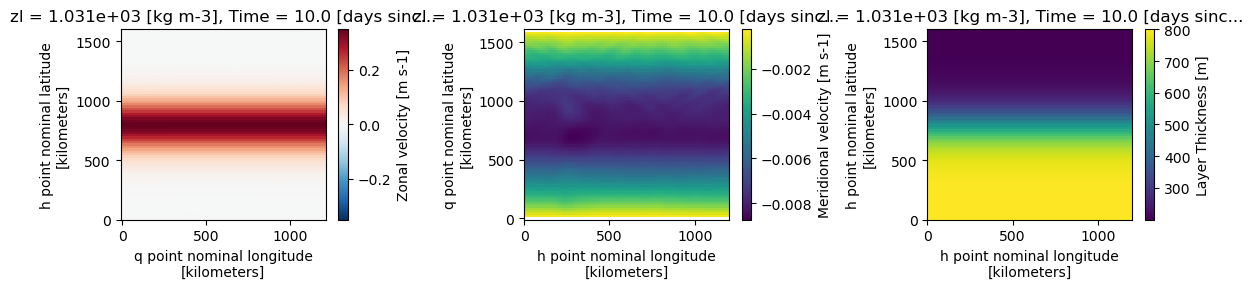

In [39]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN['prog'].u.isel(Time=0, zl=0).plot()

plt.subplot(132)
exp_ANN['prog'].v.isel(Time=0, zl=0).plot()

plt.subplot(133)
exp_ANN['prog'].h.isel(Time=0, zl=0).plot()

plt.tight_layout()

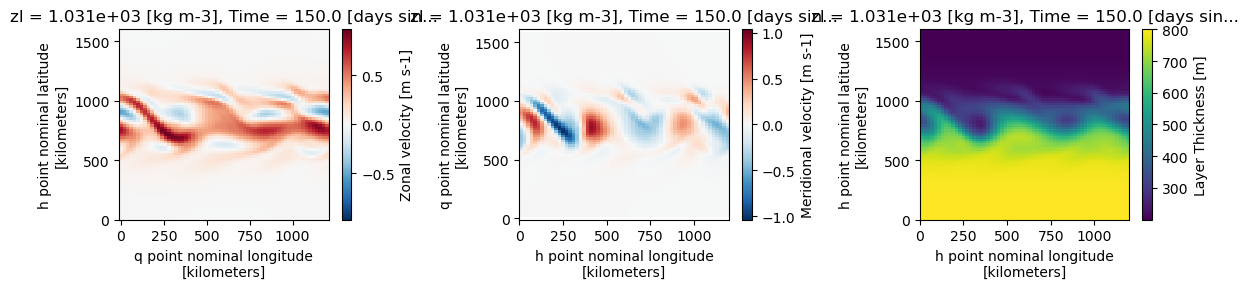

In [40]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN['prog'].u.isel(Time=-1, zl=0).plot()

plt.subplot(132)
exp_ANN['prog'].v.isel(Time=-1, zl=0).plot()

plt.subplot(133)
exp_ANN['prog'].h.isel(Time=-1, zl=0).plot()

plt.tight_layout()

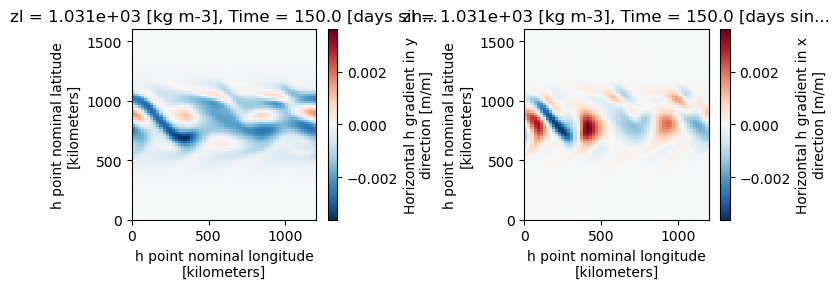

In [41]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dhdy.isel(Time=-1, zl=0).plot()

plt.subplot(122)
exp_ANN['prog'].dhdx.isel(Time=-1, zl=0).plot()

plt.tight_layout()

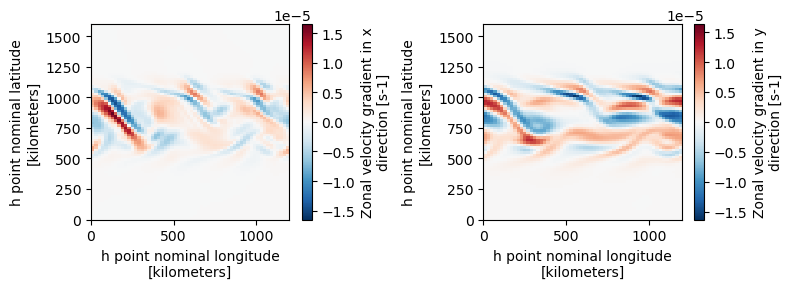

In [42]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dudx.isel(Time=-1, zl=0).plot()
plt.title('')


plt.subplot(122)
exp_ANN['prog'].dudy.isel(Time=-1, zl=0).plot()
plt.title('')

plt.tight_layout()

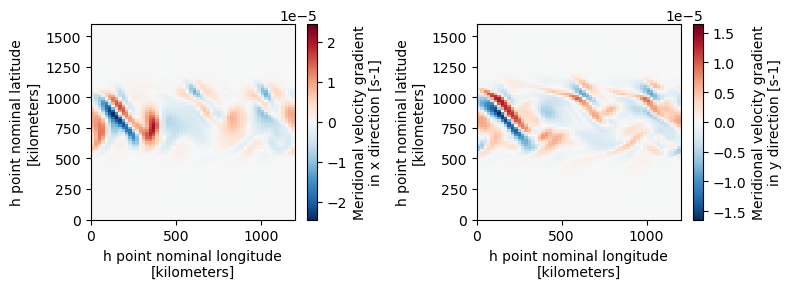

In [43]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dvdx.isel(Time=-1, zl=0).plot()
plt.title('')


plt.subplot(122)
exp_ANN['prog'].dvdy.isel(Time=-1, zl=0).plot()
plt.title('')

plt.tight_layout()

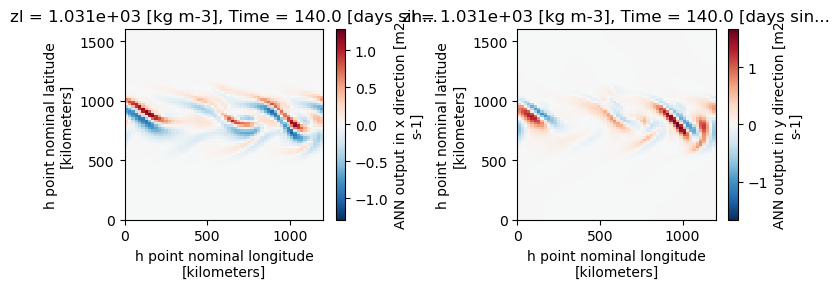

In [44]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].Fx.isel(Time=-2, zl=0).plot()

plt.subplot(122)
exp_ANN['prog'].Fy.isel(Time=-2, zl=0).plot()

plt.tight_layout()

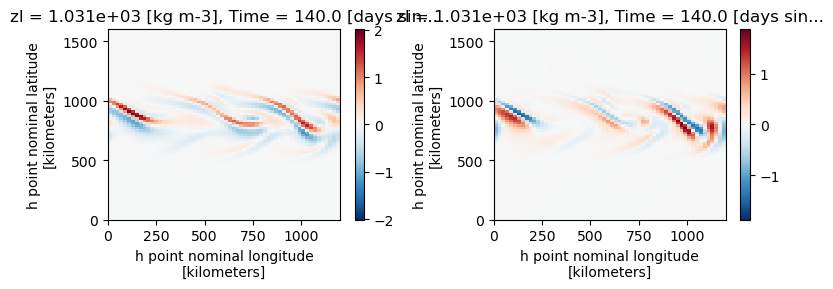

In [45]:
plt.figure(figsize=(8,3))

plt.subplot(121)
((0.1*20e3**2)*(exp_ANN['prog'].dudx * exp_ANN['prog'].dhdx + exp_ANN['prog'].dudy * exp_ANN['prog'].dhdy)).isel(Time=-2, zl=0).plot()

plt.subplot(122)
((0.1*20e3**2)*(exp_ANN['prog'].dvdx * exp_ANN['prog'].dhdx + exp_ANN['prog'].dvdy * exp_ANN['prog'].dhdy)).isel(Time=-2, zl=0).plot()

plt.tight_layout()

In [3]:
exp_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GM_test/')

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [4]:
exp_ANN_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GMann_test/')

In [5]:
exp_ANN_GM_rot = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GMann_rot_nondim_test/')

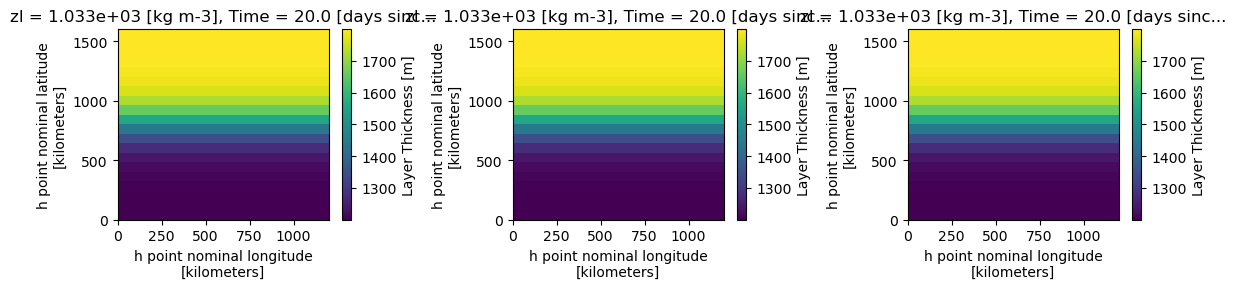

In [6]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
exp_GM['prog'].h.isel(zl=1, Time=-1).plot()

plt.subplot(132)
exp_ANN_GM['prog'].h.isel(zl=1, Time=-1).plot()

plt.subplot(133)
exp_ANN_GM_rot['prog'].h.isel(zl=1, Time=-1).plot()


plt.tight_layout()

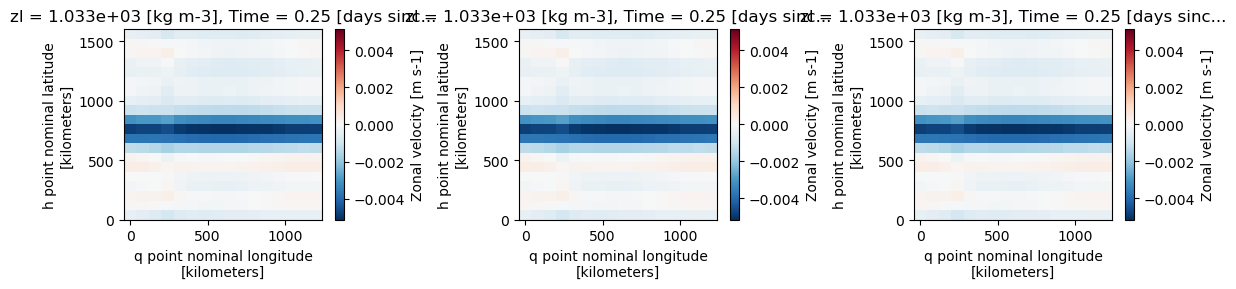

In [7]:
plt.figure(figsize=(12, 3))

idT = 0

plt.subplot(131)
exp_GM['prog'].u.isel(zl=1, Time=idT).plot()

plt.subplot(132)
exp_ANN_GM['prog'].u.isel(zl=1, Time=idT).plot()

plt.subplot(133)
exp_ANN_GM_rot['prog'].u.isel(zl=1, Time=idT).plot()

plt.tight_layout()

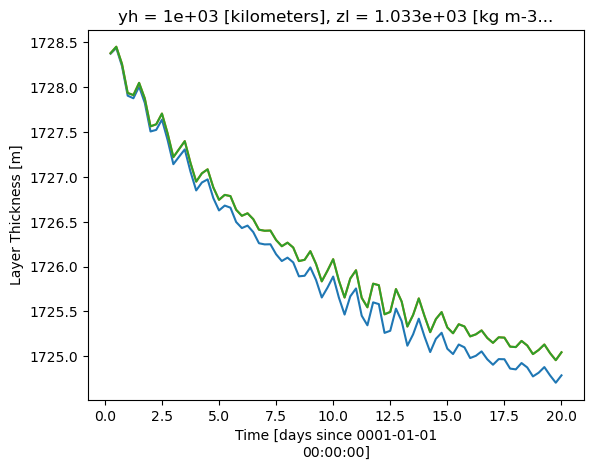

In [9]:
exp_GM['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM_rot['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

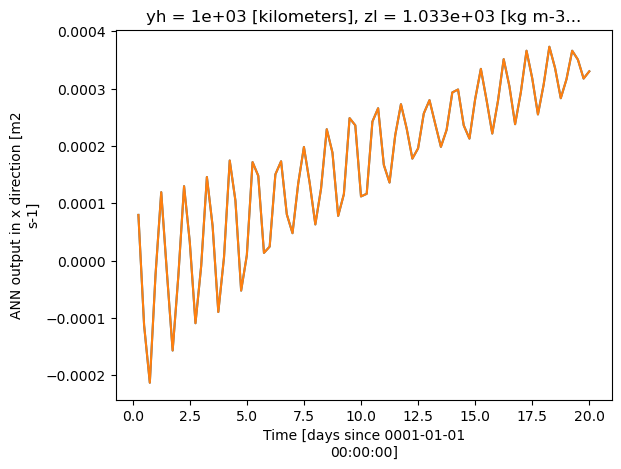

In [11]:
exp_ANN_GM_rot['prog'].Fx.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].Fx.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

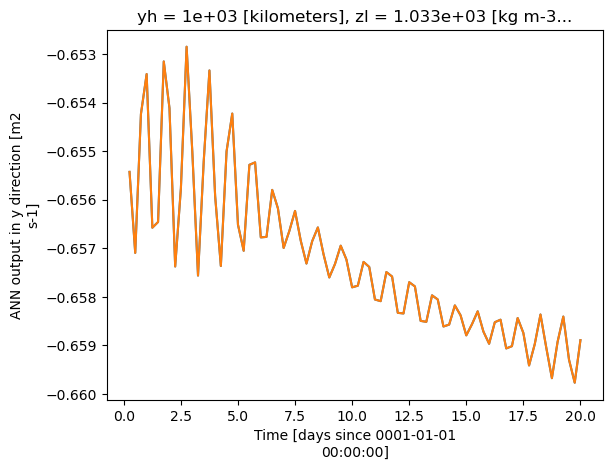

In [12]:
exp_ANN_GM_rot['prog'].Fy.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].Fy.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

### Old

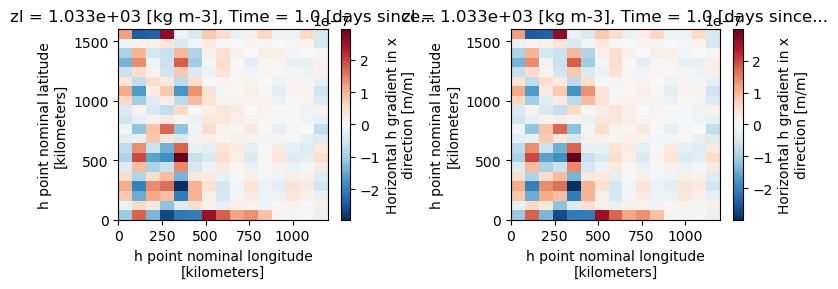

In [126]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.tight_layout()

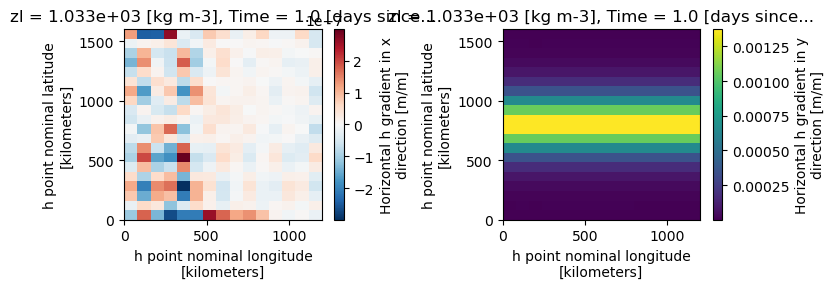

In [127]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].dhdy.isel(zl=1, Time=-1).plot()

plt.tight_layout()

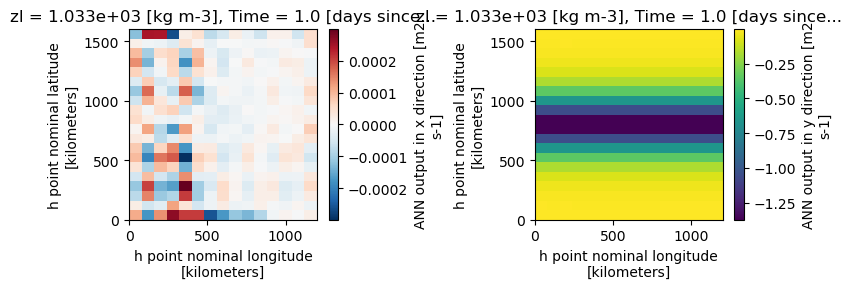

In [128]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].Fy.isel(zl=1, Time=-1).plot()

plt.tight_layout()

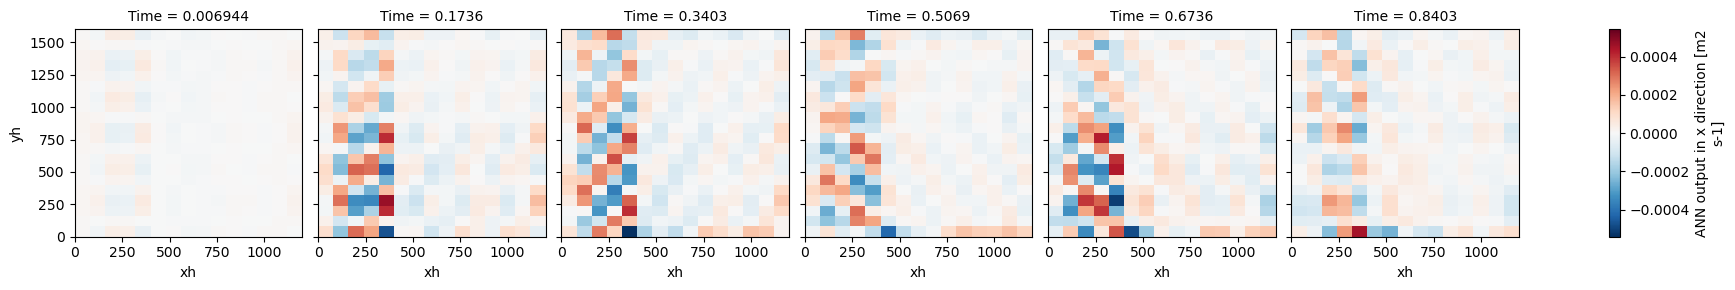

In [129]:
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=slice(0, 144, 24)).plot(col='Time')

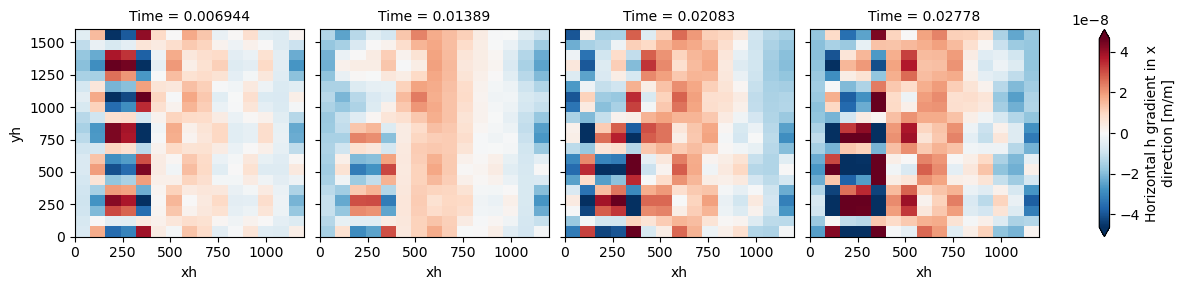

In [131]:
exp_ANN['prog'].dhdx.isel(zl=1, Time=slice(0, 4)).plot(col='Time', robust=True)

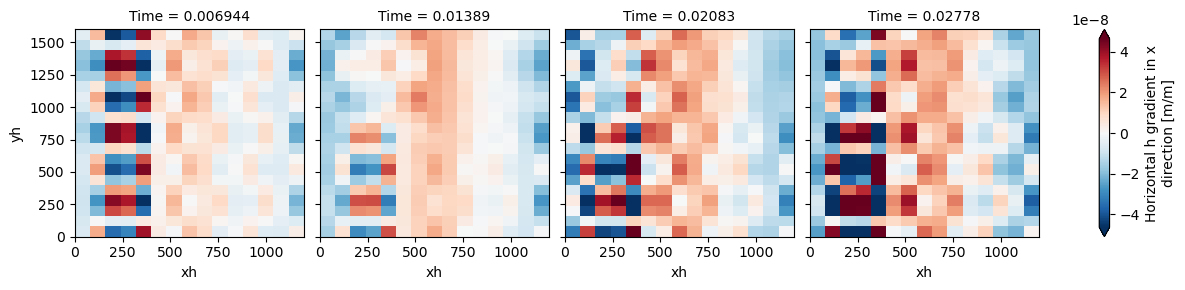

In [130]:
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=slice(0, 4)).plot(col='Time', robust=True)

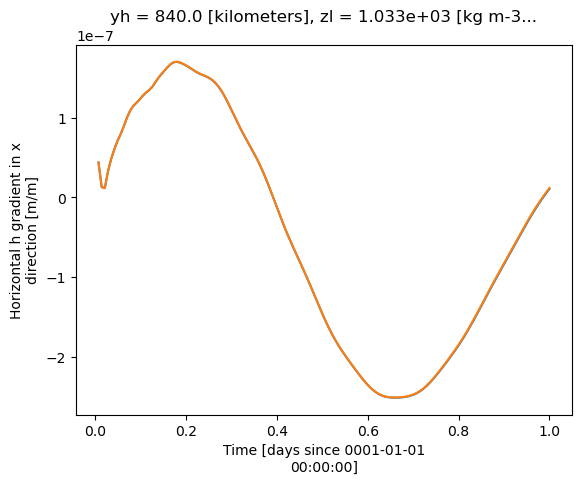

In [132]:
exp_ANN['prog'].dhdx.isel(zl=1, xh=2, yh= 10).plot()
exp_ANN_4core['prog'].dhdx.isel(zl=1, xh=2, yh= 10).plot()

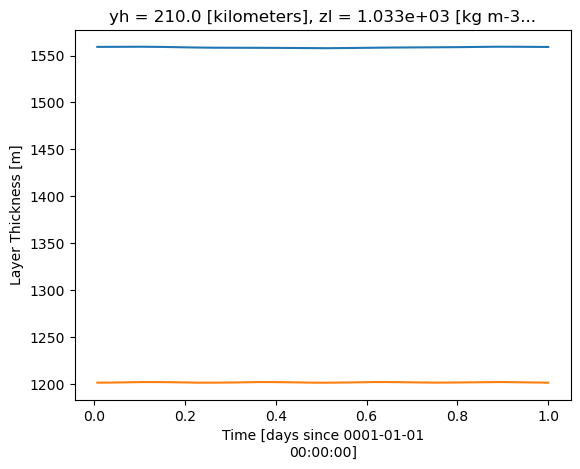

In [122]:
exp_ANN['prog'].h.isel(zl=1, xh=2, yh= 10).plot()
exp_ANN_4core['prog'].h.isel(zl=1, xh=2, yh= 10).plot()

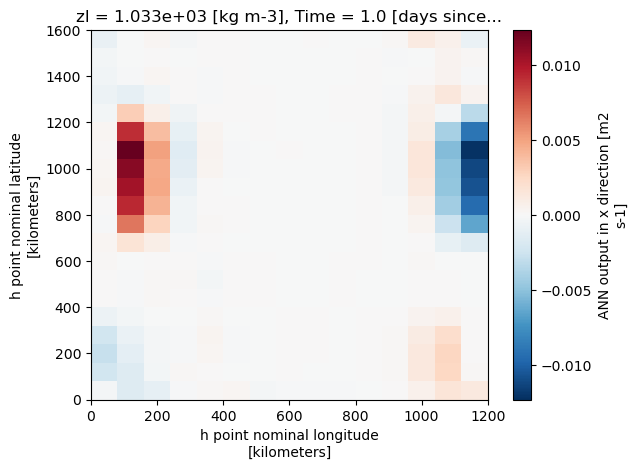

In [96]:
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=-1).plot()

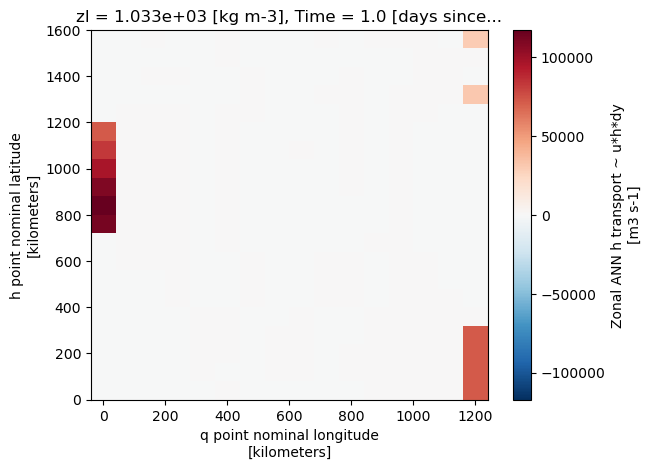

In [97]:
exp_ANN_4core['prog'].uhTrANN.isel(zl=1, Time=-1).plot()

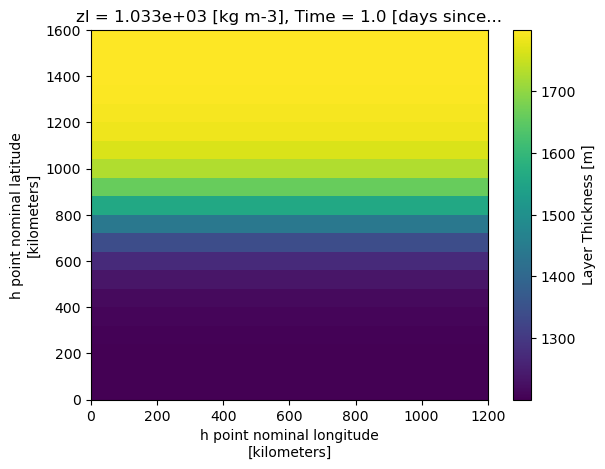

In [55]:
exp_ANN['prog'].h.isel(zl=1, Time=-1).plot()

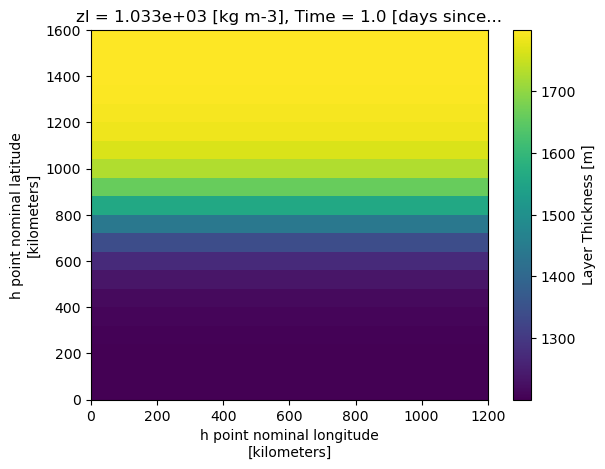

In [56]:
exp_ANN['prog'].h.isel(zl=1, Time=-1).plot()

In [101]:
exp_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GM_test/')

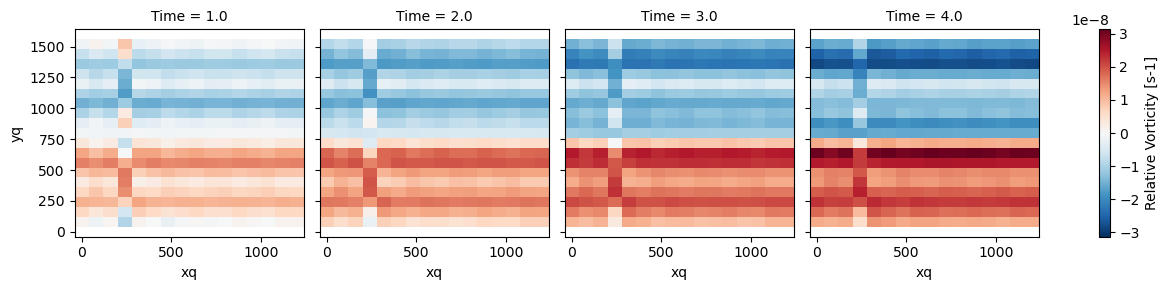

In [102]:
exp_GM['prog'].RV.isel(zl=1).plot(col='Time')

In [103]:
exp_ANN['prog']

<xarray.Dataset>
Dimensions:  (xq: 16, yh: 20, zl: 2, Time: 144, xh: 15, yq: 21, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 80.0 160.0 240.0 ... 1.04e+03 1.12e+03 1.2e+03
  * yh       (yh) float64 40.0 120.0 200.0 280.0 ... 1.4e+03 1.48e+03 1.56e+03
  * zl       (zl) float64 1.031e+03 1.033e+03
  * Time     (Time) float64 0.006944 0.01389 0.02083 ... 0.9861 0.9931 1.0
  * xh       (xh) float64 40.0 120.0 200.0 280.0 ... 1e+03 1.08e+03 1.16e+03
  * yq       (yq) float64 0.0 80.0 160.0 240.0 ... 1.44e+03 1.52e+03 1.6e+03
  * zi       (zi) float64 1.03e+03 1.032e+03 1.034e+03
Data variables:
    u        (Time, zl, yh, xq) float32 dask.array<chunksize=(144, 2, 20, 16), meta=np.ndarray>
    v        (Time, zl, yq, xh) float32 dask.array<chunksize=(144, 2, 21, 15), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    dhdx     (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    dhdy     (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    Fx       (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    Fy       (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    uhTrANN  (Time, zl, yh, xq) float64 dask.array<chunksize=(144, 2, 20, 16), meta=np.ndarray>
    vhTrANN  (Time, zl, yq, xh) float64 dask.array<chunksize=(144, 2, 21, 15), meta=np.ndarray>
    e        (Time, zi, yh, xh) float32 dask.array<chunksize=(144, 3, 20, 15), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float32 dask.array<chunksize=(144, 2, 21, 16), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float32 dask.array<chunksize=(144, 2, 21, 16), meta=np.ndarray>
Attributes:
    filename:   prog_00.nc
    title:      Phillips experiment
    grid_type:  regular
    grid_tile:  N/A

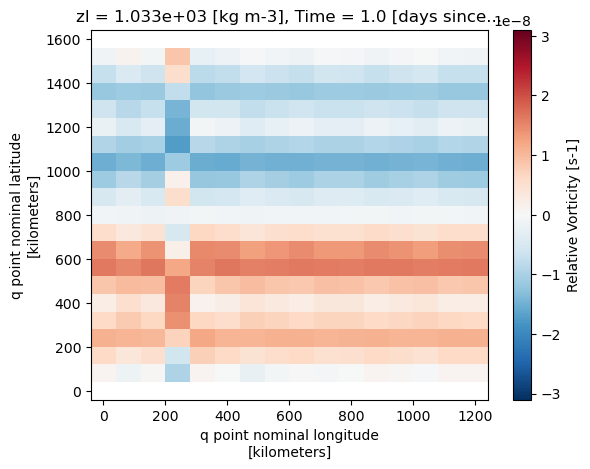

In [106]:
exp_ANN['prog'].RV.isel(zl=1, Time=-1).plot(vmin=-3.1e-8)

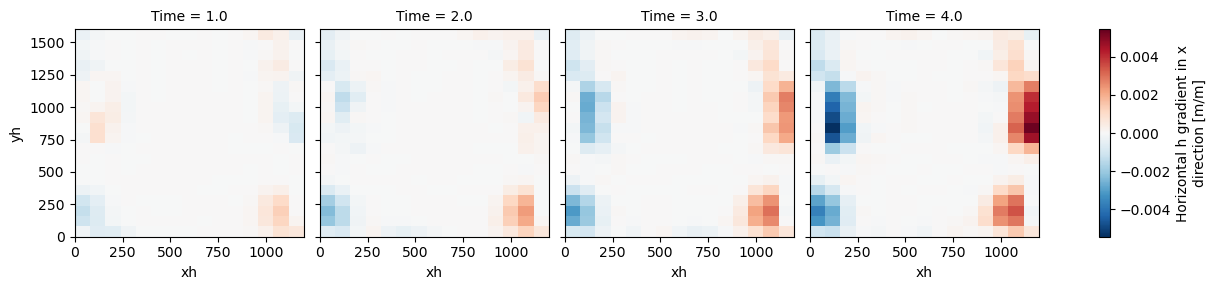

In [83]:
exp_ANN['prog'].dhdx.isel(zl=0).plot(col='Time')

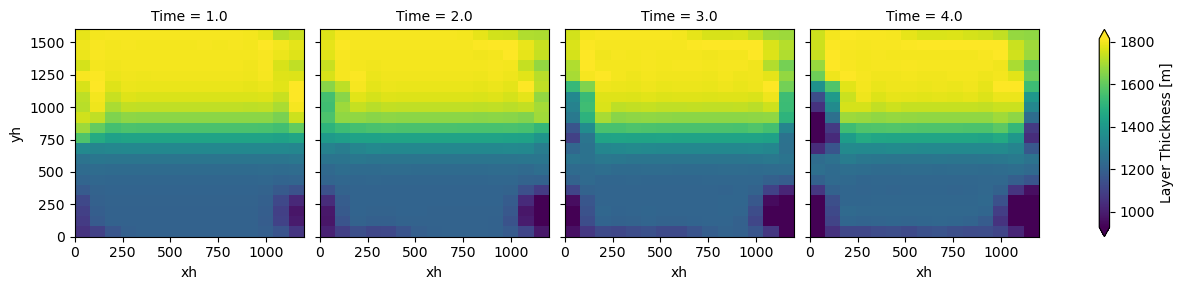

In [84]:
exp_ANN['prog'].h.isel(zl=1).plot(col='Time', robust=True)

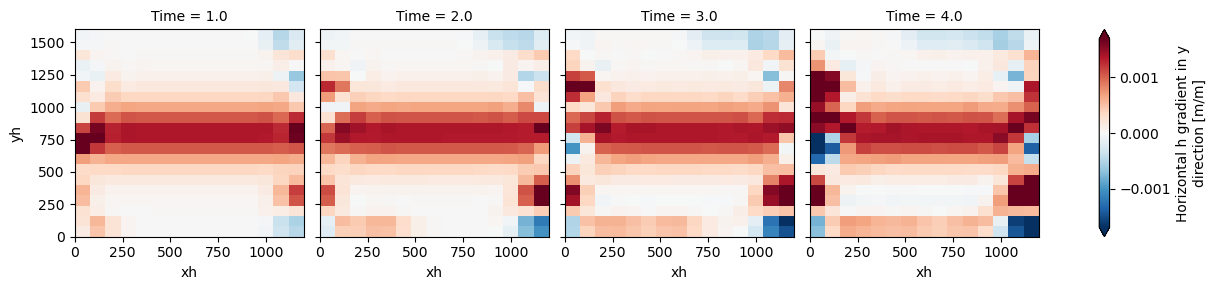

In [85]:
exp_ANN['prog'].dhdy.isel(zl=1).plot(col='Time', robust=True)

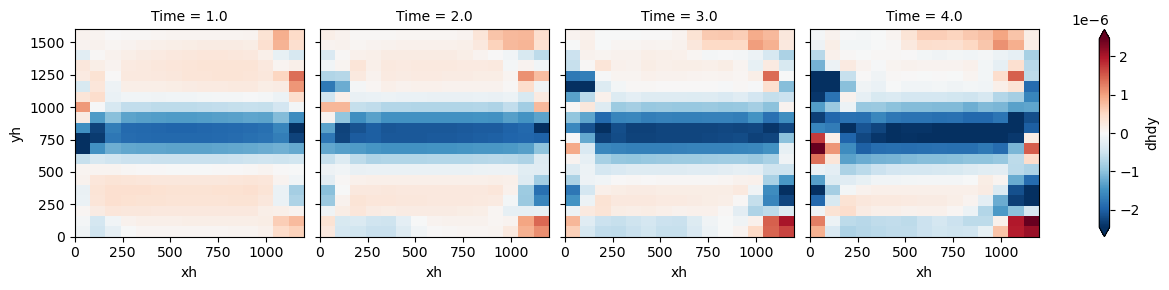

In [86]:
 (exp_ANN['prog'].dhdy.isel(zl=0) + exp_ANN['prog'].dhdy.isel(zl=1) ).plot(col='Time', robust=True)

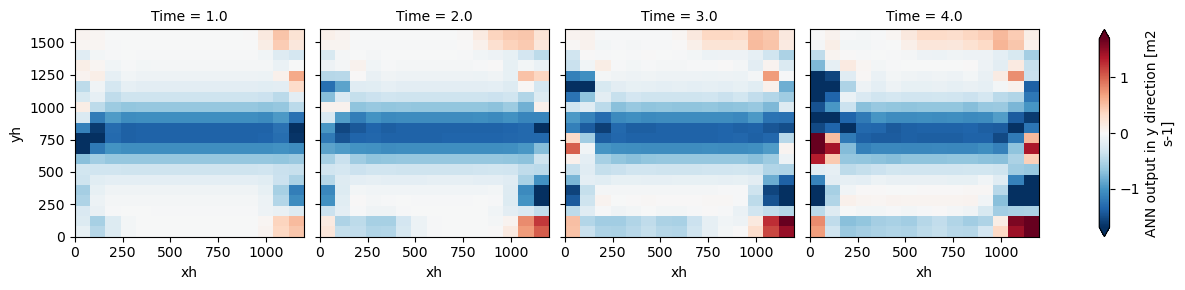

In [87]:
exp_ANN['prog'].Fy.isel(zl=1).plot(col='Time', robust=True)

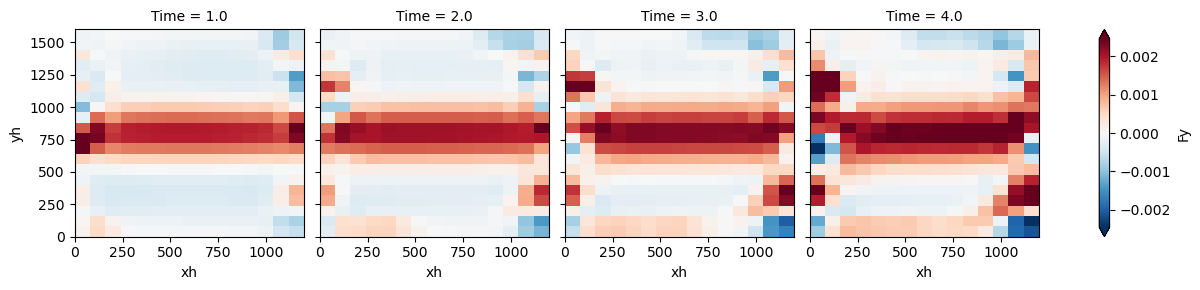

In [88]:
(exp_ANN['prog'].Fy.isel(zl=0) + exp_ANN['prog'].Fy.isel(zl=1)).plot(col='Time', robust=True)

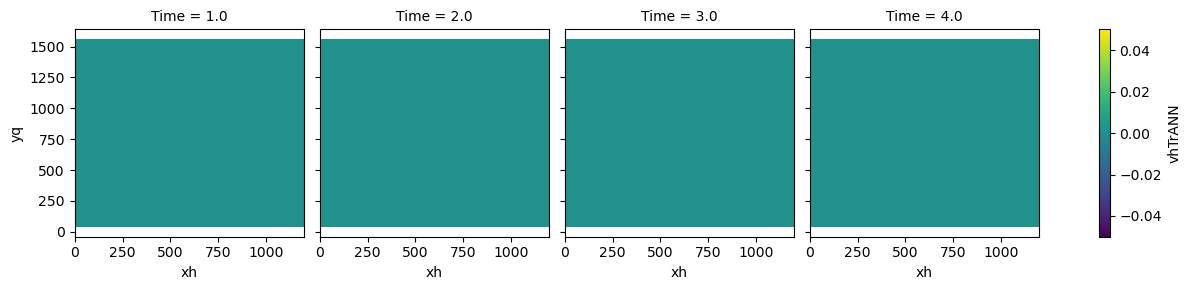

In [89]:
(exp_ANN['prog'].vhTrANN.isel(zl=0) + exp_ANN['prog'].vhTrANN.isel(zl=1)).plot(col='Time', robust=True)

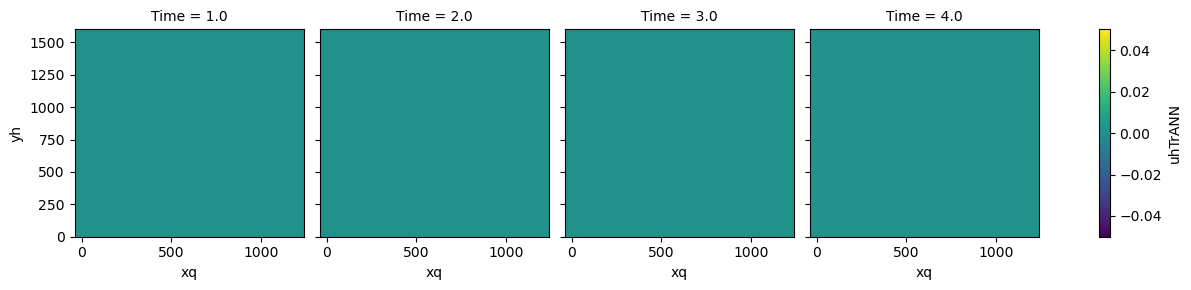

In [90]:
(exp_ANN['prog'].uhTrANN.isel(zl=0) + exp_ANN['prog'].uhTrANN.isel(zl=1)).plot(col='Time', robust=True)

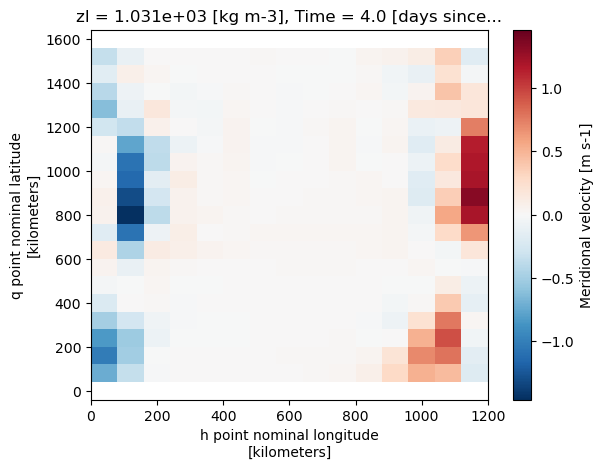

In [92]:
exp_ANN['prog'].v.isel(zl=0, Time=-1).plot()

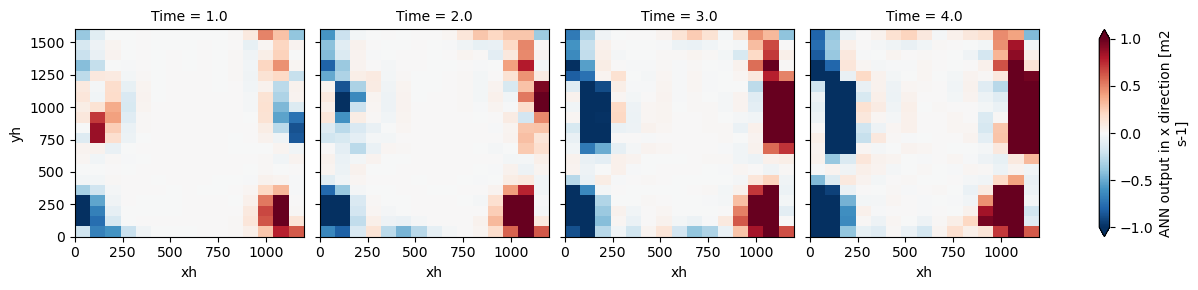

In [66]:
exp_ANN['prog'].Fx.isel(zl=1).plot(col='Time', vmin=-1)

In [74]:
1200/15

80.0

In [77]:
0.25 * 0.8 / ( 600 * ( 2/80e3**2 ) )

1066666.6666666667